In [1]:
from src.benchmark import summarize_benchmark, benchmark_visualization, benchmark
from src.consistency_evaluation import consistency_evaluation
from benchmark_configures import configurations,scoring, data_dir, centers, max_iter, n_tests, seed
from src.utils import create_dir_if_not_exist
import os

In [2]:
report_dir = os.path.join('report','main','benchmark')
benchmark(data_dir, report_dir, centers, configurations, scoring, n_tests=n_tests, max_iter=max_iter, seed=seed)

benchmark with LOWESS ...: 100%|██████████| 10/10 [00:00<00:00, 80.76it/s]


# Results for the main manuscript

## Benchmark results

In [3]:
benchmark_results, stats = summarize_benchmark(report_dir)

==== Summary of benchmark results ====
| model                           | AUC-ROC     | AUC-PRC     | NLL          |
|:--------------------------------|:------------|:------------|:-------------|
| Logistic Regression             | 0.794±0.054 | 0.341±0.061 | -0.538±0.051 |
| Per-cluster Logistic Regression | 0.803±0.049 | 0.352±0.063 | -0.527±0.048 |
| Decision Tree                   | 0.775±0.057 | 0.274±0.069 | -0.552±0.060 |
| Per-cluster Decision Tree       | 0.773±0.052 | 0.281±0.066 | -0.564±0.064 |
| LOWESS                          | 0.865±0.044 | 0.429±0.066 | -0.256±0.089 |
| LASSO                           | 0.777±0.064 | 0.314±0.068 | -0.570±0.045 |
| Random Forest                   | 0.852±0.064 | 0.421±0.106 | -0.271±0.092 |
| INVASE                          | 0.790±0.062 | 0.341±0.071 | -0.541±0.064 |
| BC                              | 0.899±0.043 | 0.502±0.067 | -0.383±0.067 |
| iTransplant                     | 0.895±0.045 | 0.502±0.062 | -0.396±0.069 |


## Consistency evaluation

In [4]:
center=centers[0]
consistency_results= consistency_evaluation(data_dir, center, report_dir, seed=seed, max_iter=max_iter)
consistency_results.loc[:,'consistency']= 100*consistency_results.loc[:,'avg consistency']
consistency_results.loc[:,['model','consistency']].style.format({'consistency':'{:.2f}'})

,model,consistency
0,iTransplant with lambda=0.0,91.29
1,iTransplant with lambda=0.01,85.05
2,iTransplant with lambda=0.1,99.74
3,INVASE,41.65
4,BC,46.80


## Action matching performance comparison at transplant center level (for the appendix)

In [5]:
appendix_report_dir = os.path.join('report','main','benchmark')
create_dir_if_not_exist(appendix_report_dir)

In [6]:
considered_models=['BC','INVASE','Per-cluster Decision Tree','Per-cluster Logistic Regression','iTransplant']
mask = benchmark_results['description'].isin(considered_models)
selected_results = benchmark_results.loc[mask]

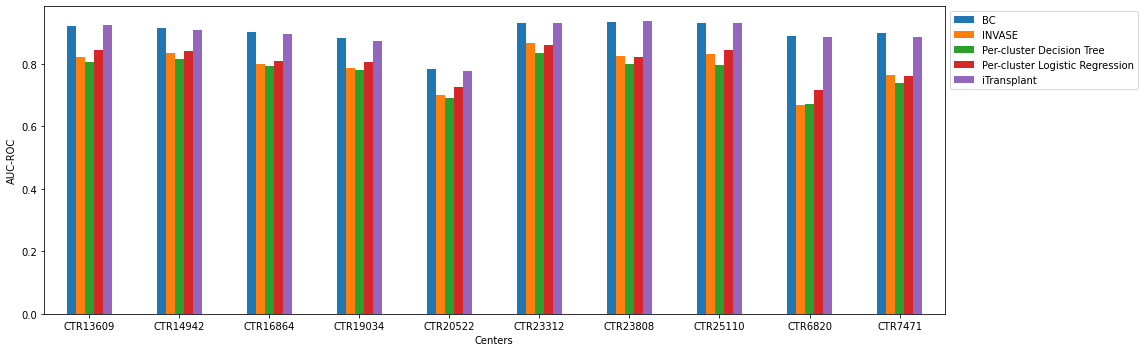

In [7]:
fig=benchmark_visualization(selected_results,metric='AUC-ROC')
fig.savefig(os.path.join(appendix_report_dir,'center-wise_action_matching_performance_AUC-ROC.pdf'))
fig

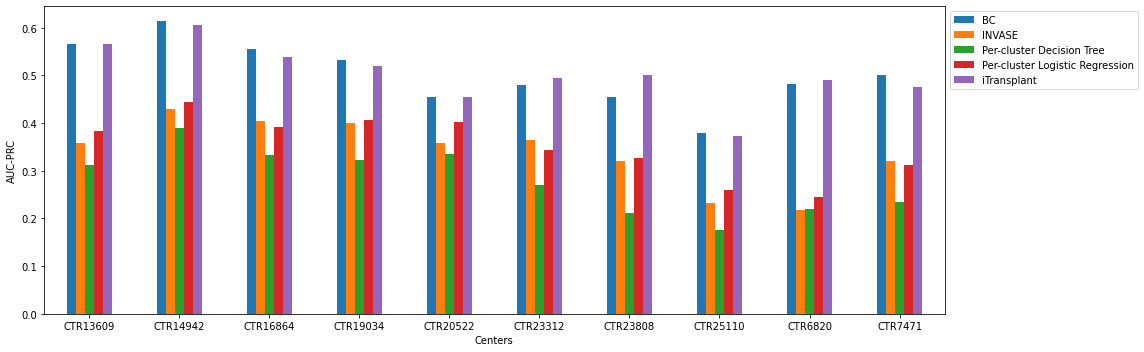

In [8]:
fig=benchmark_visualization(selected_results,metric='AUC-PRC')
fig.savefig(os.path.join(appendix_report_dir,'center-wise_action_matching_performance_AUC-PRC.pdf'))
fig